# Backtesting a Simple Strategy

In [28]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt

### 1. Download data for the gold ETF GLD

In [37]:
gld = yf.download('GLD', start='2023-01-01', end='2024-01-01')
gld.drop('Adj Close', axis=1, inplace=True)

[*********************100%%**********************]  1 of 1 completed


### 2. Add MA and instantaneous rate of return

In [40]:
gld['9_day'] = gld.Open.rolling(9).mean()
gld['21_day'] = gld.Open.rolling(21).mean()
gld['Return'] = np.log(gld.Close).diff()
gld.head()

,Open,High,Low,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2023-02-01,179.750000,181.729996,178.630005,181.669998,7996000,NaN,NaN,NaN
2023-02-02,181.080002,181.110001,177.740005,177.899994,8842400,NaN,NaN,-0.020970
2023-02-03,174.919998,175.429993,173.119995,173.460007,13674400,NaN,NaN,-0.025274
2023-02-06,174.110001,174.460007,173.279999,173.820007,8957000,NaN,NaN,0.002073
2023-02-07,173.720001,175.270004,173.470001,173.979996,6794200,NaN,NaN,0.000920


In [41]:
gld.dropna(inplace=True)
gld.head()

,Open,High,Low,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2023-03-02,170.520004,170.979996,170.360001,170.660004,3950700,169.918888,172.500953,-0.000586
2023-03-03,171.449997,172.600006,170.979996,172.490005,6894500,170.094443,172.105714,0.010666
2023-03-06,172.320007,172.369995,171.539993,171.619995,4264100,170.218889,171.688572,-0.005057
2023-03-07,170.419998,170.470001,168.520004,168.619995,8713300,170.175556,171.474286,-0.017635
2023-03-08,168.610001,169.589996,168.520004,168.539993,5718600,170.038890,171.212381,-0.000475


### 3. Plot data and signals

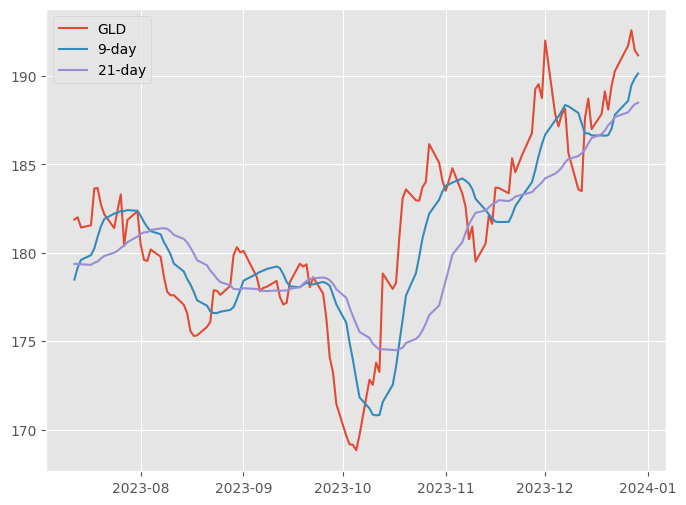

In [44]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(gld.Close[-120:], label='GLD')
    plt.plot(gld['9_day'][-120:], label='9-day')
    plt.plot(gld['21_day'][-120:], label='21-day')
    plt.legend(loc=2)
    plt.show()

### 4. Code regime -- always long or short

In [45]:
gld['regime']  = np.where(gld['9_day'] > gld['21_day'], 1, -1)

### 5. Calculate return

In [46]:
gld['strat_return'] = gld.Return * gld.regime
gld.head()

,Open,High,Low,Close,Volume,9_day,21_day,Return,regime,strat_return
Date,,,,,,,,,,
2023-03-02,170.520004,170.979996,170.360001,170.660004,3950700,169.918888,172.500953,-0.000586,-1,0.000586
2023-03-03,171.449997,172.600006,170.979996,172.490005,6894500,170.094443,172.105714,0.010666,-1,-0.010666
2023-03-06,172.320007,172.369995,171.539993,171.619995,4264100,170.218889,171.688572,-0.005057,-1,0.005057
2023-03-07,170.419998,170.470001,168.520004,168.619995,8713300,170.175556,171.474286,-0.017635,-1,0.017635
2023-03-08,168.610001,169.589996,168.520004,168.539993,5718600,170.038890,171.212381,-0.000475,-1,0.000475


### 6. Compare returns system vs. buy and hold

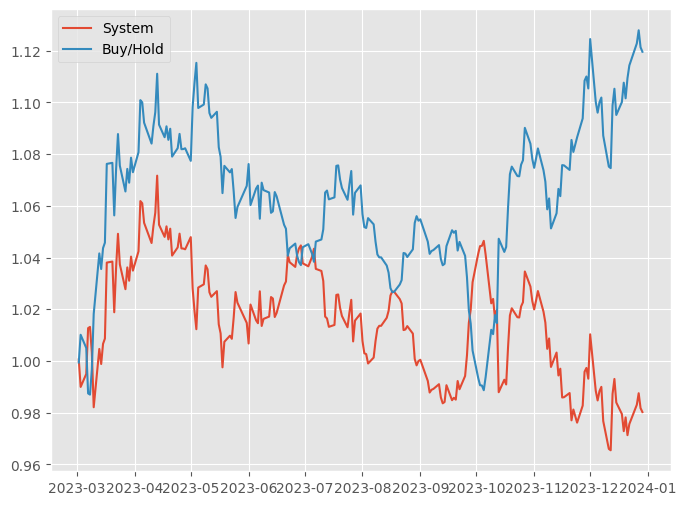

In [51]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(np.exp(gld.strat_return.cumsum()),label='System')
    plt.plot(np.exp(gld.Return.cumsum()), label='Buy/Hold')
    plt.legend()
    plt.show()

### 7. Numerically

In [48]:
print("System total return: {:>10.2%}".format(np.exp(gld.strat_return.sum())))
print("Buy/Hold total return: {:>10.2%}".format(np.exp(gld.Return.sum())))

System total return:     98.02%
Buy/Hold total return:    111.95%
